In [28]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = (10,10)
plt.figure(figsize=(20, 20))
random_seed = 42

<Figure size 1440x1440 with 0 Axes>

In [29]:
def func(x):
    return np.exp(x[0]) + (x[0] + x[1])**2

In [30]:
np.random.seed(random_seed)
w_0 = np.asarray([1,1])
w = w_0.copy()
w_list = [w.copy()]
eps = 1e-3
k = 0
max_der = 1

while max_der > eps:
    k += 1
    der1_x = np.exp(w[0]) + 2*(w[0] + w[1])
    der2_xx = np.exp(w[0]) + 2
    der1_y = 2*(w[0] + w[1])
    der2_yy = 2
    der2_xy = 2
    max_der = max(der1_x, der1_y)
    phi1_r = -(der1_x)**2 - (der1_y)**2
    phi2_r = der2_xx*(der1_x)**2 + 2*der2_xy*der1_x*der1_y + der2_yy*(der1_y)**2
    lr = -phi1_r / phi2_r
    #print(der1_y.astype(np.float64), der1_x)
    w = w - lr * np.asarray([der1_x.astype(np.float64), der1_y.astype(np.float64)])
    w_list.append(w.copy())
    
print(k, 'Num steps')
w_list = np.array(w_list)
w

587 Num steps


array([-5.68862217,  5.68983688])

In [31]:
# w_true = вроде как нет аналитического решения (x = -inf, y = inf)
# X = np.random.uniform(-5, 5, (1, 2))
# X *= (np.arange(2) * 2 + 1)[np.newaxis, :] 
# Y = X.dot(w_true) + np.random.normal(0, 2, 1)

In [32]:
# matplotlib.rcParams.update({'font.size': 16})

# # Визуализируем градиентный спуск
# A, B = np.meshgrid(np.linspace(-30, 30, 100), np.linspace(-30, 30, 100))

# levels = np.empty_like(A)
# for i in range(A.shape[0]):
#     for j in range(A.shape[1]):
#         w_tmp = np.array([A[i, j], B[i, j]])
#         levels[i,j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

# plt.figure(figsize=(13, 9))
# plt.title('GD trajectory')
# plt.xlabel('$w_1$')
# plt.ylabel('$w_2$')
# plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
# plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
# plt.gca().set_aspect('equal')

# CS = plt.contour(A, B, levels, levels=np.logspace(-1, 3, num=15), cmap=plt.cm.rainbow_r)
# CB = plt.colorbar(CS, shrink=0.8, extend='both')

# plt.scatter(w_true[0], w_true[1], c='r')
# plt.scatter(w_list[:, 0], w_list[:, 1])
# plt.plot(w_list[:, 0], w_list[:, 1])

# plt.show()

In [33]:
def plot_convergence_2d(func, steps, ax, xlim, ylim, cmap="viridis", title=""):
    """
    Функция отрисовки шагов градиентного спуска. 
    Не меняйте её код без необходимости! 
    :param func: функция, которая минимизируется градиентным спуском
    :param steps: np.array[N x 2] — шаги алгоритма
    :param ax: холст для отрисовки графика
    :param xlim: tuple(float), 2 — диапазон по первой оси
    :param ylim: tuple(float), 2 — диапазон по второй оси
    :param cmap: str — название палитры
    :param title: str — заголовок графика
    """

    ax.set_title(title, fontsize=20, fontweight="bold")
    # Отрисовка значений функции на фоне
    xrange = np.linspace(*xlim, 100)
    yrange = np.linspace(*ylim, 100)
    grid = np.meshgrid(xrange, yrange)
    X, Y = grid
    fvalues = np.array([func(x) for x in
        np.dstack(grid).reshape(-1, 2)]).reshape((xrange.size, yrange.size))
    ax.pcolormesh(xrange, yrange, fvalues, cmap=cmap, alpha=0.8)
    CS = ax.contour(xrange, yrange, fvalues)
    ax.clabel(CS, CS.levels, inline=True)
    # Отрисовка шагов алгоритма в виде стрелочек
    arrow_kwargs = dict(linestyle="--", color="black", alpha=0.8)
    for i, _ in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                *steps[i],
                *(steps[i+1] - steps[i]),
                **arrow_kwargs
            )
    # Отрисовка шагов алгоритма в виде точек
    n = len(steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(steps[:, 0], steps[:, 1], c=color_list, zorder=10)
    ax.scatter(steps[-1, 0], steps[-1, 1], 
               color="red", label=f"estimate = {np.round(steps[-1], 2)}")
    # Финальное оформление графиков
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel("$y$")
    ax.set_xlabel("$x$")
    ax.legend(fontsize=16)

/home/dima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


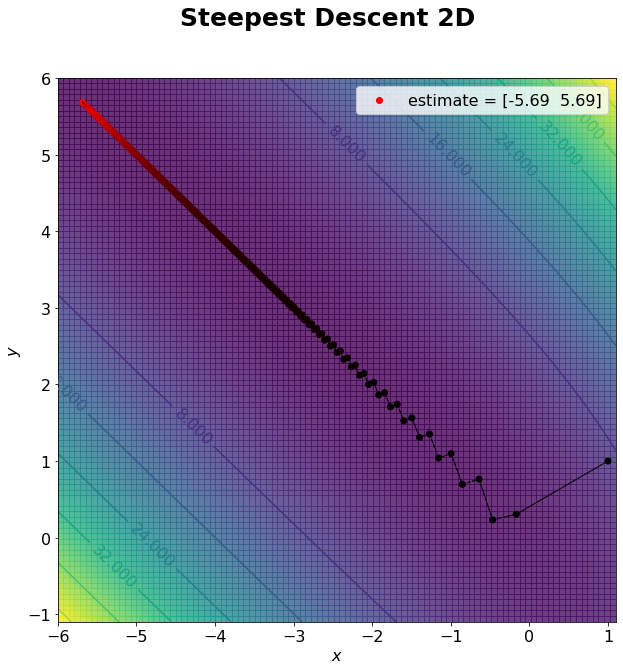

In [34]:
fig, axes = plt.subplots(figsize=(10, 10), squeeze=False)
fig.suptitle("Steepest Descent 2D", fontsize=25, fontweight="bold")
plot_convergence_2d(func, w_list, axes[np.unravel_index(0, shape=axes.shape)], (-6, 1.1), (-1.1, 6))